# DATA UNDERSTANDING

## Database Information

Sumber Database : Sakila

Tabel yang digunakan pada Database ini adalah :
- Film
- Category
- Film_Category

Tabel yang dipilih saling berkaitan dengan menghubungkan Columns, dengan tabel "Film" sebagai Fokus Analisis

# DATABASE

## Connecting to Database

In [1]:
# Import Modules

import pandas as pd
import numpy as np
import mysql.connector as sqlcon
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect to Database

myDB = sqlcon.connect(
    user = 'admin',
    password = 'admin',
    host = 'localhost',
    database = 'sakila',
)

In [4]:
# Query Function

curs = myDB.cursor()

def sql_table (query) :
    curs.execute (query)
    result = curs.fetchall()
    df = pd.DataFrame(result, columns=curs.column_names)
    return df

## ERD Sakila, yang digunakan adalah FILM -> CATEGORY -> FILM_CATEGORY

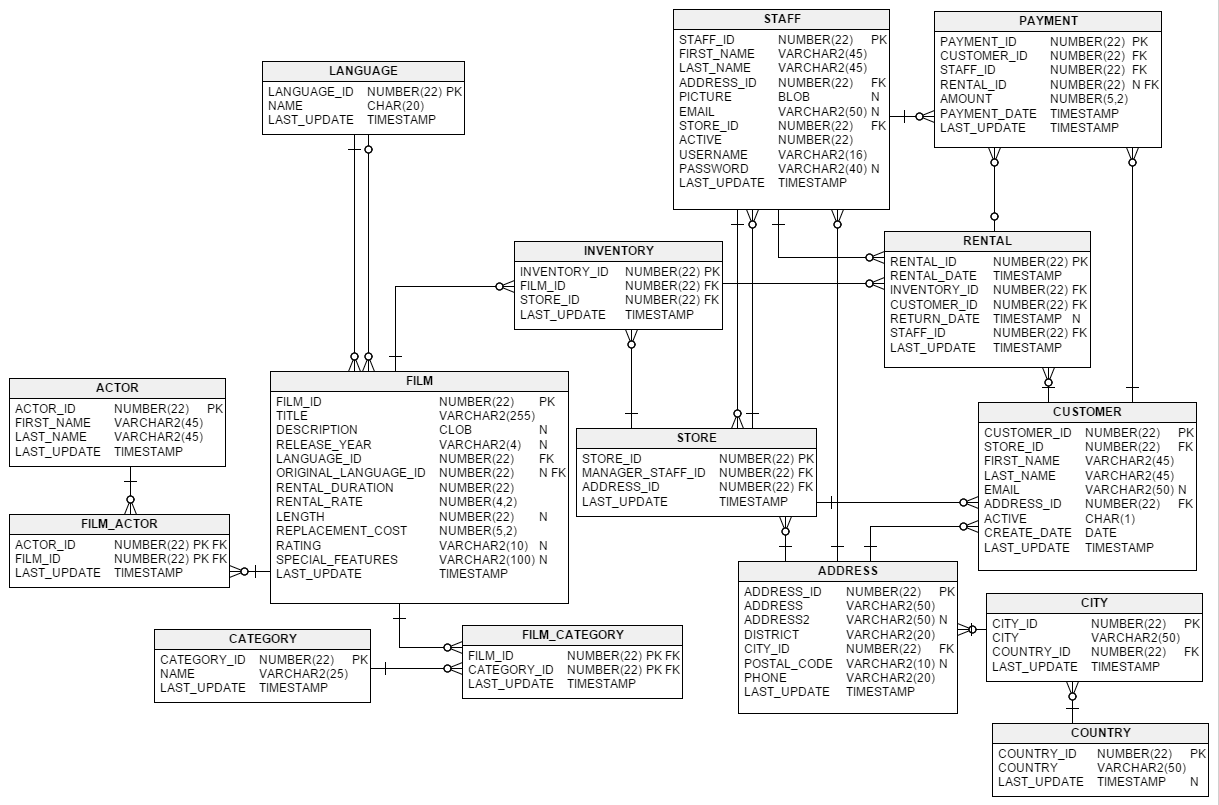

In [5]:
# Membuat Query
df = sql_table (
    '''
select *

from film F
left join film_category FC on FC.film_id = F.film_id
left join category C on C.category_id = FC.category_id;
    '''
)
df.head()

,film_id,title,description,release_year,language_id,original_language_id,rental_duration,rental_rate,length,replacement_cost,rating,special_features,last_update,film_id,category_id,last_update,category_id,name,last_update
0,1,ACADEMY DINOSAUR,A Epic Drama of a Feminist And a Mad Scientist...,2006,1,None,6,0.99,86,20.99,PG,"{Behind the Scenes, Deleted Scenes}",2006-02-15 05:03:42,1,6,2006-02-15 05:07:09,6,Documentary,2006-02-15 04:46:27
1,2,ACE GOLDFINGER,A Astounding Epistle of a Database Administrat...,2006,1,None,3,4.99,48,12.99,G,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42,2,11,2006-02-15 05:07:09,11,Horror,2006-02-15 04:46:27
2,3,ADAPTATION HOLES,A Astounding Reflection of a Lumberjack And a ...,2006,1,None,7,2.99,50,18.99,NC-17,"{Deleted Scenes, Trailers}",2006-02-15 05:03:42,3,6,2006-02-15 05:07:09,6,Documentary,2006-02-15 04:46:27
3,4,AFFAIR PREJUDICE,A Fanciful Documentary of a Frisbee And a Lumb...,2006,1,None,5,2.99,117,26.99,G,"{Behind the Scenes, Commentaries}",2006-02-15 05:03:42,4,11,2006-02-15 05:07:09,11,Horror,2006-02-15 04:46:27
4,5,AFRICAN EGG,A Fast-Paced Documentary of a Pastry Chef And ...,2006,1,None,6,2.99,130,22.99,G,{Deleted Scenes},2006-02-15 05:03:42,5,8,2006-02-15 05:07:09,8,Family,2006-02-15 04:46:27


# DATA MANIPULATION

Seperti yang telah dijelaskan sebelumnya, data yang digunakan untuk dianalisis adalah data pada ```df```. Sebelum melakukan analisis lebih lanjut, hal yang harus dilakukan adalah mengecek informasi serta anomali pada data. Jika memang terdapat hal-hal yang dianggap 'kotor' pada data, maka yang perlu dilakukan adalah melakukan penanganan pada bagian tersebut. Pada bagian ini, data akan 'dibersihkan', sehingga output akhir yang diharapkan adalah terdapat sebuah dataset yang bersih yang dapat dianalisis lebih lanjut dengan menampilkan visualisasi, serta melihat statistics-nya.

## Data Anomalies

In [6]:
# General info tentang Query
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   film_id               1000 non-null   int64         
 1   title                 1000 non-null   object        
 2   description           1000 non-null   object        
 3   release_year          1000 non-null   int64         
 4   language_id           1000 non-null   int64         
 5   original_language_id  0 non-null      object        
 6   rental_duration       1000 non-null   int64         
 7   rental_rate           1000 non-null   object        
 8   length                1000 non-null   int64         
 9   replacement_cost      1000 non-null   object        
 10  rating                1000 non-null   object        
 11  special_features      1000 non-null   object        
 12  last_update           1000 non-null   datetime64[ns]
 13  film_id            

In [7]:
df.rename(columns = {'name':'category'}, inplace = True)

In [8]:
# Check Missing Value Percentage
df.isna().sum()

film_id                    0
title                      0
description                0
release_year               0
language_id                0
original_language_id    1000
rental_duration            0
rental_rate                0
length                     0
replacement_cost           0
rating                     0
special_features           0
last_update                0
film_id                    0
category_id                0
last_update                0
category_id                0
category                   0
last_update                0
dtype: int64

In [9]:
# Menghilangkan Columns yang tidak diperlukan untuk Analisa
df.drop(['release_year', 'description', 'original_language_id', 'special_features', 'last_update', 'language_id', 'film_id', 'category_id'], axis=1, inplace = True)

In [10]:
df.isna().sum()

title               0
rental_duration     0
rental_rate         0
length              0
replacement_cost    0
rating              0
category            0
dtype: int64

In [11]:
# Mengubah tipe Data

df['rental_rate'] = df['rental_rate'].astype(float)
df['replacement_cost'] = df['replacement_cost'].astype(float)

In [12]:
df = df.drop_duplicates()

In [13]:
# Re-check Data

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   title             1000 non-null   object 
 1   rental_duration   1000 non-null   int64  
 2   rental_rate       1000 non-null   float64
 3   length            1000 non-null   int64  
 4   replacement_cost  1000 non-null   float64
 5   rating            1000 non-null   object 
 6   category          1000 non-null   object 
dtypes: float64(2), int64(2), object(3)
memory usage: 62.5+ KB


In [14]:
df

,title,rental_duration,rental_rate,length,replacement_cost,rating,category
0,ACADEMY DINOSAUR,6,0.99,86,20.99,PG,Documentary
1,ACE GOLDFINGER,3,4.99,48,12.99,G,Horror
2,ADAPTATION HOLES,7,2.99,50,18.99,NC-17,Documentary
3,AFFAIR PREJUDICE,5,2.99,117,26.99,G,Horror
4,AFRICAN EGG,6,2.99,130,22.99,G,Family
...,...,...,...,...,...,...,...
995,YOUNG LANGUAGE,6,0.99,183,9.99,G,Documentary
996,YOUTH KICK,4,0.99,179,14.99,NC-17,Music
997,ZHIVAGO CORE,6,0.99,105,10.99,NC-17,Horror
998,ZOOLANDER FICTION,5,2.99,101,28.99,R,Children


In [15]:
# Check Some Info
datadesc = []
for i in df.columns:
    datadesc.append([i,
                     df[i].dtypes,
                     df[i].isna().sum(),
                     round((df[i].isna().sum()/len(df)*100),2),
                     df[i].nunique(),
                     df[i].drop_duplicates().sample(1).values])

pd.DataFrame(datadesc,columns=['Data Features',
                               'Data Types',
                               'Null',
                               'Null Percentage',
                               'Unique',
                               'Unique Sample'])

,Data Features,Data Types,Null,Null Percentage,Unique,Unique Sample
0,title,object,0,0.0,1000,[BLOOD ARGONAUTS]
1,rental_duration,int64,0,0.0,5,[4]
2,rental_rate,float64,0,0.0,3,[4.99]
3,length,int64,0,0.0,140,[177]
4,replacement_cost,float64,0,0.0,21,[27.99]
5,rating,object,0,0.0,5,[PG-13]
6,category,object,0,0.0,16,[Action]


In [16]:
# Outlier Check With Function

Q1_amount = df['rental_rate'].describe()['25%']
Q3_amount = df['rental_rate'].describe()['75%']
iqr = Q3_amount - Q1_amount

outlier_index = df[(df['rental_rate'] < Q1_amount - (1.5 * iqr)) | (df['rental_rate']> Q3_amount + (1.5 * iqr)) ].index
not_outlier_index = df[(df['rental_rate'] > Q1_amount - (1.5 * iqr)) & (df['rental_rate']< Q3_amount + (1.5 * iqr)) ].index
df.loc[outlier_index]

,title,rental_duration,rental_rate,length,replacement_cost,rating,category


### Setelah di cek ternyata pada Data ini tidak terdapat Outliers

In [17]:
# Mensave DataFrame ke file CSV
df.to_csv('film.csv', index=False)

## 1. Jumlah Film dikelompokan berdasarkan Categori dan diagramnya

In [18]:
df['category'].unique()

array(['Documentary', 'Horror', 'Family', 'Foreign', 'Comedy', 'Sports',
       'Music', 'Classics', 'Animation', 'Action', 'New', 'Sci-Fi',
       'Drama', 'Travel', 'Games', 'Children'], dtype=object)

In [19]:
pd.crosstab(index=df['category'], columns='Jumlah', values=df['category'], aggfunc='count').sort_values('Jumlah', ascending=False)

col_0,Jumlah
category,
Sports,74
Foreign,73
Family,69
Documentary,68
Animation,66
Action,64
New,63
Drama,62
Games,61


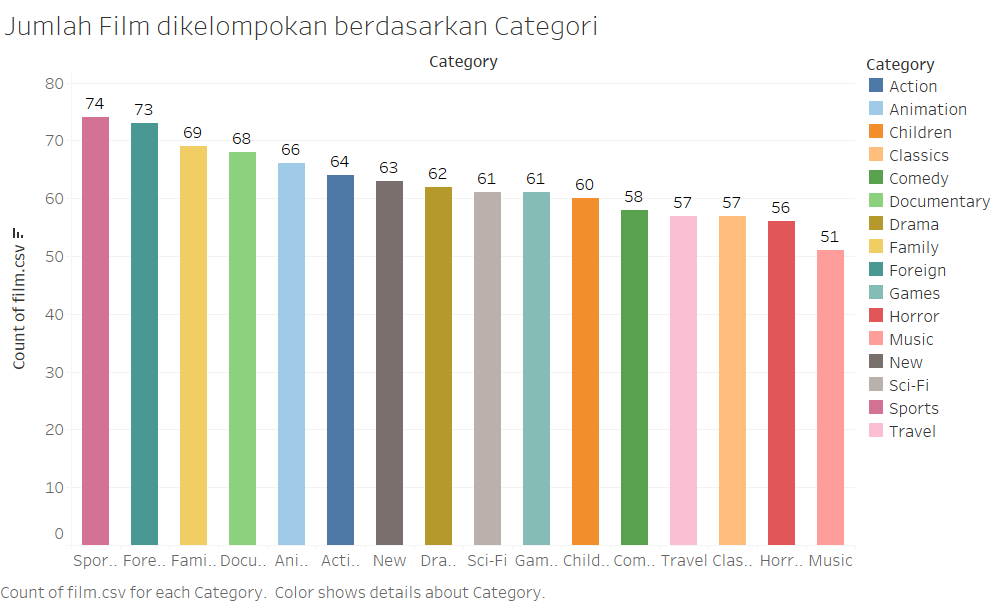

### Insight : Film dengan Kategori Sports menempati urutan Teratas dan Film dengan Kategori Musik menempati urutan Terakhir

## 2. Jumlah Film dikelompokan berdasarkan Rental_Duration dan diagramnya

In [20]:
df['rental_duration'].unique()

array([6, 3, 7, 5, 4], dtype=int64)

In [21]:
pd.crosstab(index=df['rental_duration'], columns='Jumlah', values=df['rental_duration'], aggfunc='count').sort_values('Jumlah', ascending=False)

col_0,Jumlah
rental_duration,
6,212
3,203
4,203
5,191
7,191


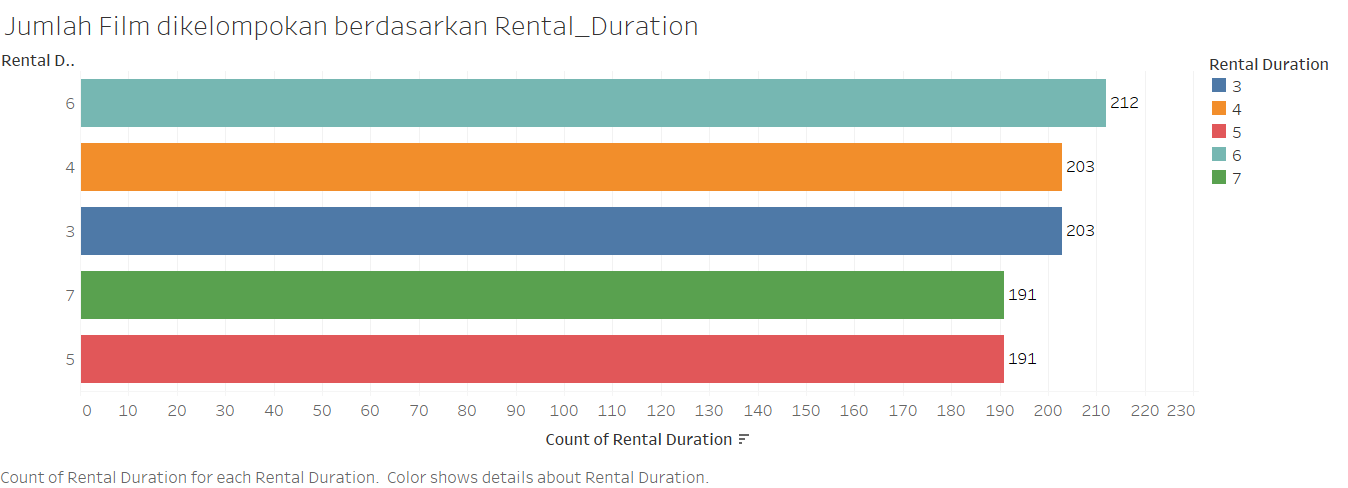

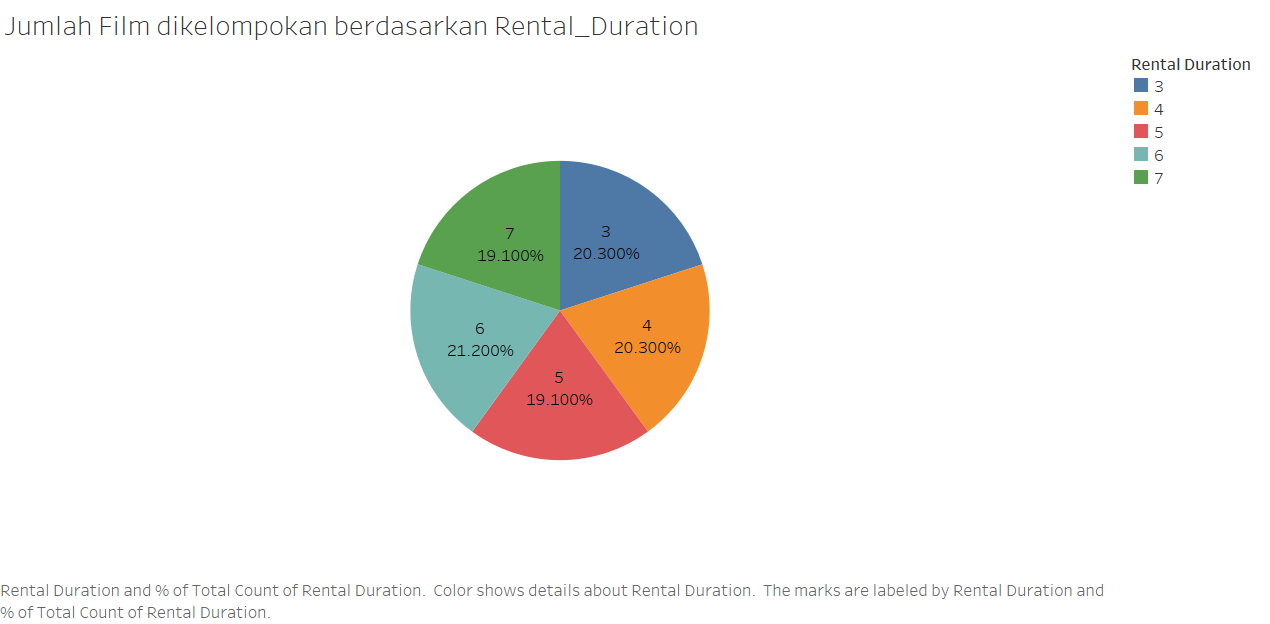

### Insight : Film dengan rental_duration 6 menempati urutan Teratas

## 3. 10 Daftar Durasi terbanyak dan jumlahnya FILM nya serta diagramnya

In [22]:
pd.crosstab(index=df['length'], columns='Jumlah', values=df['length'], aggfunc='count').sort_values('length', ascending=False).head(10)

col_0,Jumlah
length,
185,10
184,8
183,5
182,6
181,10
180,7
179,13
178,10
177,6


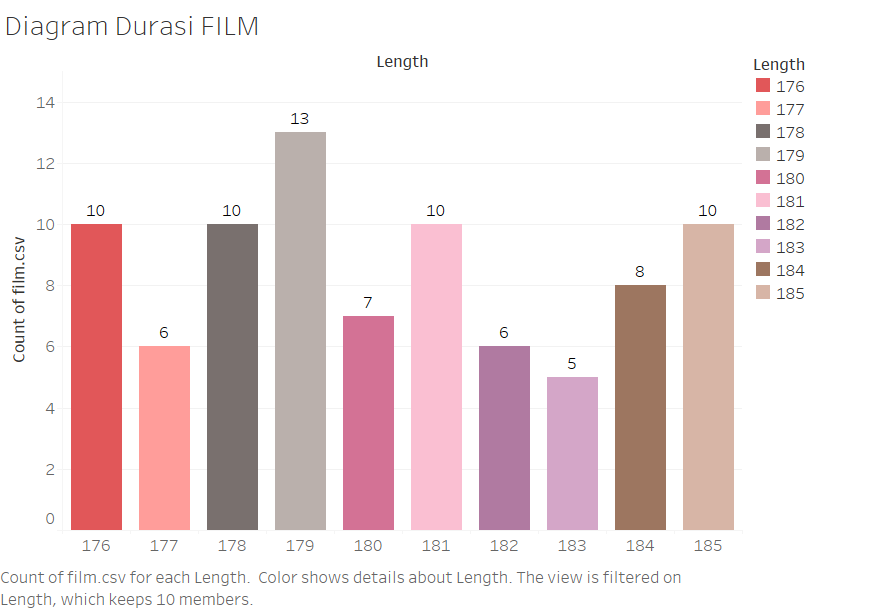

## Insight : Durasi Film terlama adalah 185 menit dengan jumlah 10 Film dan Durasi Film terpendek adalah 176 dengan jumlah 10 Film

## 4. Rating terbanyak dari semua Film yang ada

In [23]:
df['rating'].unique()

array(['PG', 'G', 'NC-17', 'PG-13', 'R'], dtype=object)

In [24]:
pd.crosstab(index=df['rating'], columns='Jumlah', values=df['rating'], aggfunc='count').sort_values('Jumlah', ascending=False)

col_0,Jumlah
rating,
PG-13,223
NC-17,210
R,195
PG,194
G,178


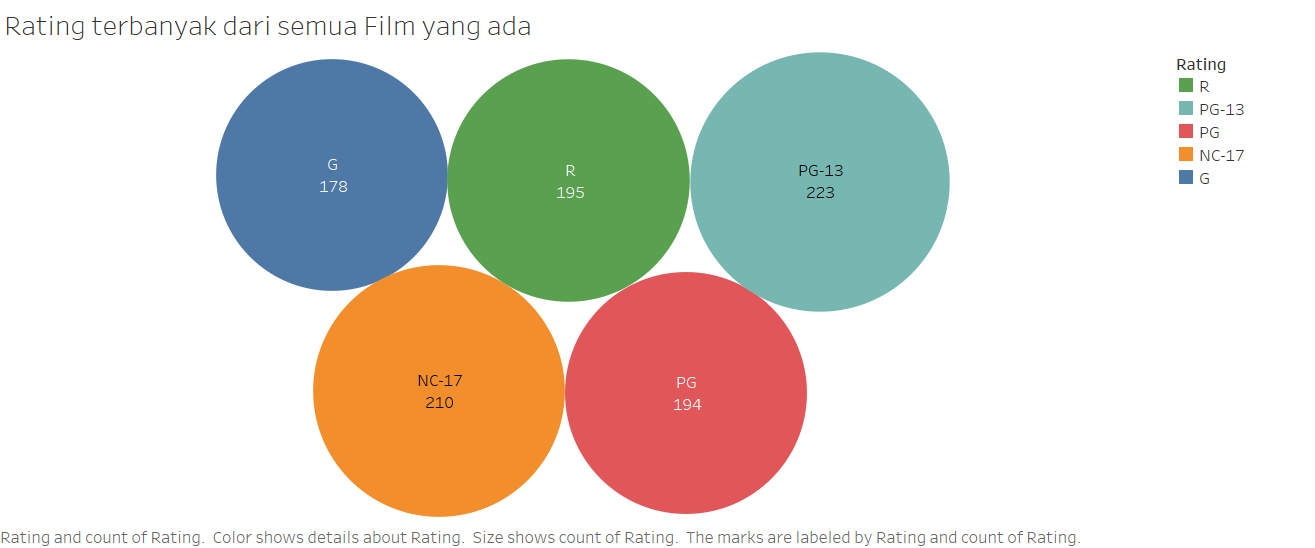

## 5. Jumlah FILM berdasarkan biaya Rental_Rate

In [25]:
df['rental_rate'].unique()

array([0.99, 4.99, 2.99])

In [26]:
pd.crosstab(index=df['rental_rate'], columns='Jumlah', values=df['rental_rate'], aggfunc='count').sort_values('Jumlah', ascending=False)

col_0,Jumlah
rental_rate,
0.99,341
4.99,336
2.99,323


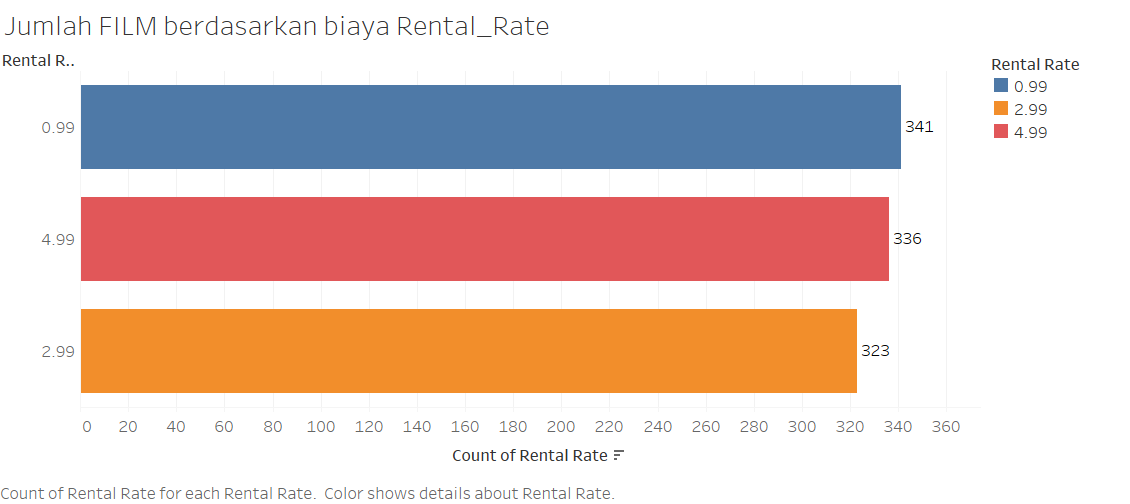

### Insight : Jumlah FILM dengan biaya 0.99 memiliki FILM terbanyak, dan FILM dengan harga 2.99 memiliki FILM paling sedikit

## 6. Statistik menggunakan Rental Rate

In [27]:
from scipy.stats import shapiro

In [30]:
st, pval = shapiro(df['rental_rate'])
if pval >= 0.05:
    print('Terima H0')
else:
    print('Tolak H0')

Tolak H0


### Insight : Distribusi pada Rental_Rate Tidak Normal karena P value kurang dari 0.05

## 7. Hubungan Antara Rental Rate, Rental Durasion, length dan Replacement Cost

<AxesSubplot:>

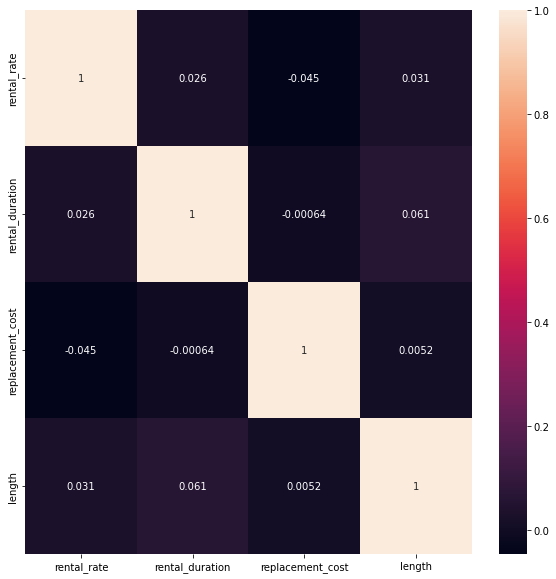

In [29]:
# Korelasi

plt.figure(figsize=(10,10))
sns.heatmap(df[['rental_rate', 'rental_duration', 'replacement_cost', 'length']].corr('spearman'), annot=True)

### Insight : Tidak adanya Korelasi Kuat antara rental_rate, rental_duration, replacement_cost dan length

## Kesimpulan :
1. Jumlah Categori Film terbanyak adalah Kategori Sport dengan jumlah Film 74, dan yang paling sedikit adalah Kategori Musik dengan jumlah 51 Film
2. Rental_Duration terpanjang adalah 7 hari dan terpendek 3 hari, sedangkan Film terbanyak berdasarkan Rental_duration adalah 212 Film dengan Rental_duration 6 hari
3. Durasi Film terpanjang adalah 185 menit dengan jumlah 10 Film
4. Rating terbanyak adalah rating PG-13 dengan total 223 Film
5. Rental_Rate termahal adalah 4.99 dengan Total 336 Film, dan Rental_Rate termurah adalah 0.99 dengan jumlah 341 Film
6. Distribusi/Persebaran data pada Rental_Rate tidak Normal karena P Value kurang dari 0.05
7. Korelasi antara rental_rate, rental_duration, length dan replacement_cost Lemah karena tidak mendekati angka 1